#   1. Data Loading and Understanding

In [1]:

from tensorflow.keras.datasets import fashion_mnist

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Testing images shape:", test_images.shape)
print("Testing labels shape:", test_labels.shape)


C:\Users\user\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\user\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing images shape: (10000, 28, 28)
Testing labels shape: (10000,)


#  2. Exploratory Data Analysis (EDA)

# Visualize Samples from the Dataset

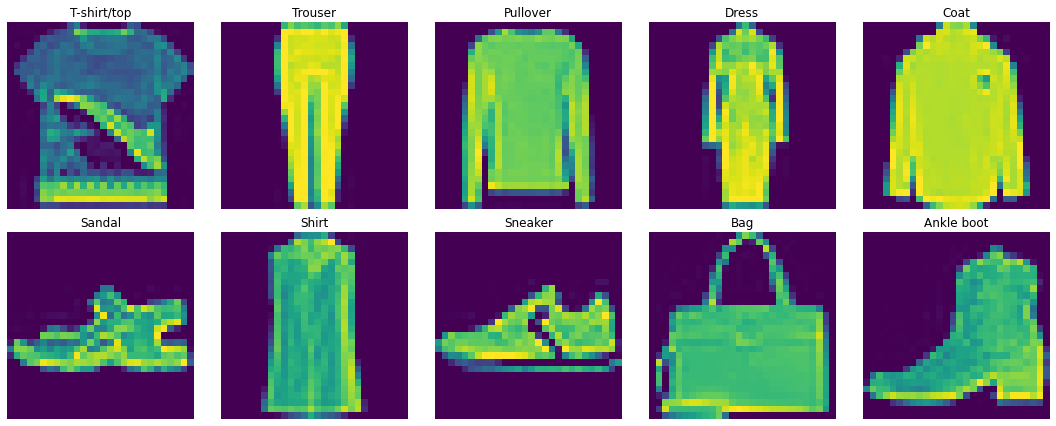

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Display random images from each class
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i in range(10):
    idx = np.random.choice(np.where(train_labels == i)[0])
    ax[i//5, i%5].imshow(train_images[idx])
    ax[i//5, i%5].set_title(class_names[i])
    ax[i//5, i%5].axis('off')
plt.tight_layout()
plt.show()


# Check the Distribution of Classes

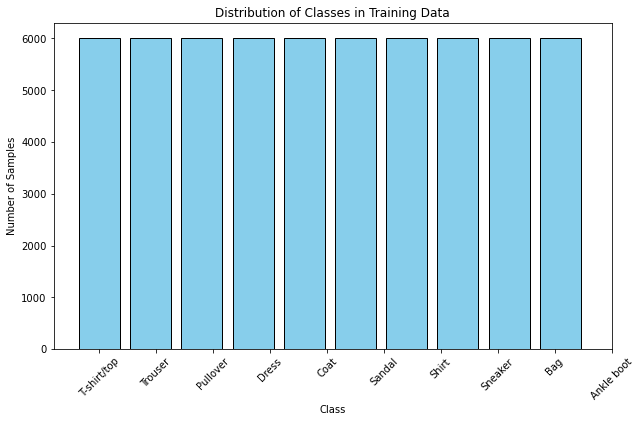

In [3]:
plt.figure(figsize=(10, 6))
plt.hist(train_labels, bins=10, rwidth=0.8, align='left', color='skyblue', edgecolor='black')
plt.xticks(ticks=range(10), labels=class_names, rotation=45)
plt.title("Distribution of Classes in Training Data")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.show()

# 3. Data Preprocessing

# Normalize the Images

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0


# Reshape the Data

In [5]:

train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)


#  4. Model Building

In [9]:

import tensorflow as tf

# Design the CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# 5. Model Training

In [11]:

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0947 - accuracy: 0.9640 - val_loss: 0.3083 - val_accuracy: 0.9141
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0816 - accuracy: 0.9696 - val_loss: 0.3228 - val_accuracy: 0.9093
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0762 - accuracy: 0.9704 - val_loss: 0.3253 - val_accuracy: 0.9143
Epoch 4/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0675 - accuracy: 0.9747 - val_loss: 0.3490 - val_accuracy: 0.9079
Epoch 5/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0600 - accuracy: 0.9770 - val_loss: 0.3753 - val_accuracy: 0.9083
Epoch 6/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0538 - accuracy: 0.9801 - val_loss: 0.4228 - val_accuracy: 0.9135
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0504 - accuracy: 0.9807 - val_loss: 0.4070 -

# 6. Visualization of Results

# Plot Training and Validation Accuracy

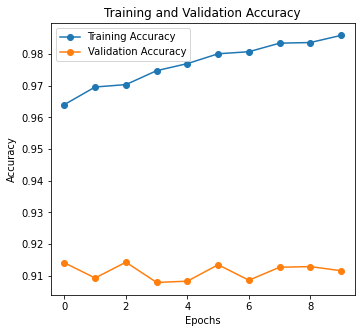

In [12]:

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


# Plot Training and Validation Loss

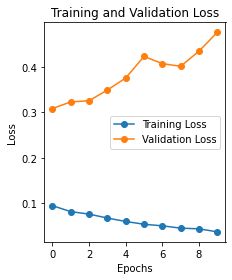

In [15]:

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


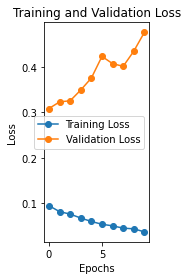

In [19]:

plt.subplot(1,3,3)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


# 7. Model Evaluation

In [20]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


313/313 [==============================] - 2s 5ms/step - loss: 0.4756 - accuracy: 0.9116
Test Accuracy: 91.16%
Test Loss: 0.4756
